# ISA: Example of usage

The International Standard Atmosphere stablishes a model for the temperature, 
pressure, density and Mach number as a function of the geopotential heights.

The ISA model refers to the US Atmosphere model of 1975 (COESA 1975), although 
from 50 km on, ISA model stablishes the 1975 US Atmosphere Model as interim.

This notebook is intended to serve as use-case for pressure, temperature and density as a function of the geopotential height, and for geopontial height as a function of pressure and temperature.

---

### Imports:

Import libraries:
- pyturb.gas_models.isa
- numpy
- matplotlib.pyplot
    

In [6]:
# Import isa library
from pyturb.gas_models import isa

In [7]:
import numpy as np
from matplotlib import pyplot as plt

### Get layer data:

The layer information of a given `h` geopotential height ($h [m]$) can be retrived with `isa.get_atmosdata(h)`:

In [8]:
height = [0, 11000, 20000, 32000, 47000, 51000, 71000, 84852]
for i_layer, h in enumerate(height):
    lapse_rate, Tbase, pbase, dbase, heightbase, layer_name = isa.get_atmosdata(h)
    print('{5} -{4:>14s} - zbase={3:9.3f}m, alpha={0:9.2e}K/m, Tbase={1:6.2f}K, pbase={2:10.3f}Pa, dbase={6:6.3e}kg/m^3'.format(lapse_rate, Tbase, pbase, heightbase, layer_name, i_layer+1, dbase))

1 -   troposphere - zbase=    0.000m, alpha=-6.50e-03K/m, Tbase=288.15K, pbase=101325.000Pa, dbase=1.225e+00kg/m^3
2 -    tropopause - zbase=11000.000m, alpha= 0.00e+00K/m, Tbase=216.65K, pbase= 22632.000Pa, dbase=3.639e-01kg/m^3
3 - stratosphere1 - zbase=20000.000m, alpha= 1.00e-03K/m, Tbase=216.65K, pbase=  5474.900Pa, dbase=8.803e-02kg/m^3
4 - stratosphere2 - zbase=32000.000m, alpha= 2.80e-03K/m, Tbase=228.65K, pbase=   868.020Pa, dbase=1.323e-02kg/m^3
5 -   stratopause - zbase=47000.000m, alpha= 0.00e+00K/m, Tbase=270.65K, pbase=   110.910Pa, dbase=1.428e-03kg/m^3
6 -   mesosphere1 - zbase=51000.000m, alpha=-2.80e-03K/m, Tbase=270.65K, pbase=    66.939Pa, dbase=8.616e-04kg/m^3
7 -   mesosphere2 - zbase=71000.000m, alpha=-2.00e-03K/m, Tbase=214.65K, pbase=     3.956Pa, dbase=6.421e-05kg/m^3
8 -   mesosphere3 - zbase=84852.000m, alpha= 0.00e+00K/m, Tbase=186.95K, pbase=     0.373Pa, dbase=6.958e-06kg/m^3


### Get $p, T, \rho$:

Given a geopotential height in meters, $h [m]$, the pressure, temperature and density can be calculated as:
- T = isa.temperature_isa(h, isa_dev)
- p = isa.pressure_isa(h, isa_dev)
- $\rho$ = isa.density_isa(h, isa_dev)

The density can algo be calculated with the state equation, provided a temperature and pressure:
$$\rho =\frac{p}{R_{air}T}$$
- $\rho$ = isa.density_state_eq(h, isa_dev)

Note that `isa_dev` is the ISA temperature deviation, assuming 15ºC for a standard day. By default, `isa_dev` is zero.

In [36]:
# For geopotential height of 1000m
T0 = isa.temperature_isa(1000)
p0 = isa.pressure_isa(1000)
rho0 = isa.density_state_eq(1000)
print('T=', T0, 'K; p=', p0, 'Pa; rho=', rho0, 'kg/m^3')

T= 281.65 K; p= 89874.57050221064 Pa; rho= 1.1116418116877353 kg/m^3


Note that the geopotential height can be provided as a numpy array:

In [38]:
# Create a vector from troposphere to mesosphere3 (0m to 84852m).
h = np.linspace(0,84851, 100)

# Temperature:
T = isa.temperature_isa(h)

# Pressure
p = isa.pressure_isa(h)

# Density
d = isa.density_state_eq(h)

Text(0.5, 0, 'geopotential height [m]')

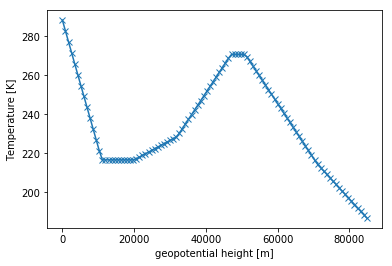

In [29]:
plt.figure()
plot_temp = plt.plot(h,T, '-x')
plt.ylabel("Temperature [K]")
plt.xlabel("geopotential height [m]")

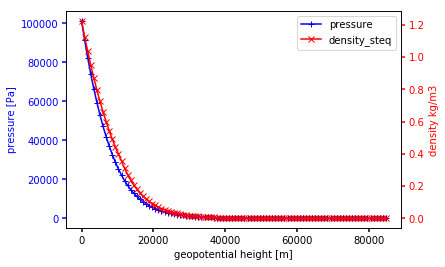

In [17]:
fig, eje1 = plt.subplots()
eje2 = eje1.twinx()
plot1, = eje1.plot(h, p, "b-+", label="pressure")
plot2, = eje2.plot(h, d, "r-x", label="density_steq")


eje1.set_xlabel("geopotential height [m]")
eje1.set_ylabel("pressure [Pa]")
eje2.set_ylabel("density kg/m3")
eje1.yaxis.label.set_color(plot1.get_color())
eje2.yaxis.label.set_color(plot2.get_color())

tkw = dict(size=4, width=1.5)
eje1.tick_params(axis='y', colors=plot1.get_color(), **tkw)
eje2.tick_params(axis='y', colors=plot2.get_color(), **tkw)
eje1.tick_params(axis='x', **tkw)

lines = [plot1, plot2]
eje1.legend(lines, [l.get_label() for l in lines])

If height is provided as a

In [61]:
print('Temperature:')
print('isa_dev by default: T=', isa.temperature_isa([0, 1000, 2000, 3000]))
print('isa_dev=10, T=', isa.temperature_isa([0, 1000, 2000, 3000], 10))
print('isa_dev as array, T=', isa.temperature_isa([0, 1000, 2000, 3000], [5, 10, 15, 20]))
print('Pressure:')
print('isa_dev by default: ', isa.pressure_isa([5000, 8000, 10000, 0]))
print('isa_dev as array, p=', isa.pressure_isa([5000, 8000, 10000, 0], [5, 10, 15, 20]))

Temperature:
isa_dev by default: T= [288.15 281.65 275.15 268.65]
isa_dev=10, T= [298.15 291.65 285.15 278.65]
isa_dev as array, T= [293.15 291.65 290.15 288.65]
Pressure:
isa_dev by default:  [ 54019.91210376  35599.81142263  26436.26759381 101325.        ]
isa_dev as array, p= [ 59808.91814357  44270.65635858  37213.28921173 144175.50822339]


### Height computation

The geopotential height can be recalculated given a temperature or pressure, by using `isa.height_from_temperature_isa(T)` or  `isa.height_from_pressure_isa`.

Note that different heights may produce the same temperature. For example:

$$T=250K \rightarrow h=\left[5869.2m, 39625.0m, 58375.0m\right]$$


In [62]:
isa.height_from_temperature_isa(250)

array([ 5869.23076923, 39625.        , 58375.        ])

Text(0.5, 0, 'geopotential height [m]')

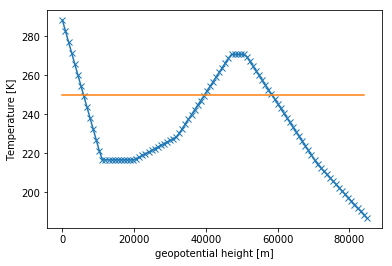

In [63]:
plt.figure()
plot_temp = plt.plot(h,T, '-x')
plt.plot([0,84000], [250, 250])
plt.ylabel("Temperature [K]")
plt.xlabel("geopotential height [m]")

On the other hand, pressure-altitude yields a single value of the geopotential height:

Text(0.5, 0, 'geopotential height [m]')

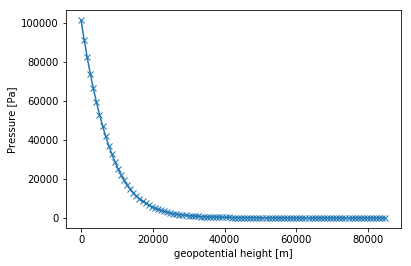

In [64]:
plt.figure()
plot_temp = plt.plot(h,p, '-x')
plt.ylabel("Pressure [Pa]")
plt.xlabel("geopotential height [m]")

In [65]:
isa.height_from_pressure_isa([90000, 50000, 2500])

array([  988.50076686,  5574.43747451, 25028.56008313])

Array-numpy can be used to input more than one temperature or pressure, wich yields a geopoential height numpy array. Note that if more than one height value can be retrieved, then an array of arrays is returned. I.e:
- $ T=200K \rightarrow h=78325m$
- $ T=220K \rightarrow \left[h=10484.6, 23350, 69089.3\right]$
- $T=250K \rightarrow \left[h=5869.2m, 39625.0m, 58375m\right]$
- $ T=275K \rightarrow h=2023.1m$

In [66]:
isa.height_from_temperature_isa([200, 220, 250, 275])

array([array([78325.]),
       array([10484.61538462, 23350.        , 69089.28571429]),
       array([ 5869.23076923, 39625.        , 58375.        ]),
       array([2023.07692308])], dtype=object)

Finally, suppose $h=7500m, \Delta T_{ISA}=0K$ and $h=9000m, \Delta T_{ISA}=+10K$

In [68]:
T75 = isa.temperature_isa(7500)
print(T75)
T90 = isa.temperature_isa(9000, 10)
print(T90)

p75 = isa.pressure_isa(7500)
p90 = isa.pressure_isa(9000,10)
print(p75)
print(p90)

239.39999999999998
239.64999999999998
38251.42414215849
38461.83768243645


Now retrieve geopotential height, indicating the ISA deviation:

In [69]:
hp75 = isa.height_from_pressure_isa(p75)
hp90 = isa.height_from_pressure_isa(p90, 10)
print(hp75)
print(hp90)

7500.000000000005
9000.0
